# ReGraph tutorial (NetworkX backend)


## Part 1: Rewriting simple graph with attributes

This notebook consists of simple examples of usage of the ReGraph library

In [1]:
from regraph import NXGraph, Rule
from regraph import plot_graph, plot_instance, plot_rule

In [2]:
%matplotlib inline

### 1. Creating and modifying a graph object

ReGraph implements a wrapper around NetworkX directed graph objects (`nx.Graph`) using the `NXGraph` class.

In [3]:
# Create an empty graph object
graph = NXGraph()

# Add a list of nodes, optionally with attributes
graph.add_nodes_from(
    [
        'Alice',
        ('Bob', {'age': 15, 'gender': 'male'}),
        ('Jane', {'age': 40, 'gender': 'female'}),
        ('Eric', {'age': 55, 'gender': 'male'})
])

# Add a list of edges, optionally with attributes
graph.add_edges_from([
    ("Alice", "Bob"),
    ("Jane", "Bob", {"type": "parent", "since": 1993}),
    ("Eric", "Jane", {"type": "friend", "since": 1985}),
    ("Eric", "Alice", {"type": "parent", "since": 1992}),
])

In [4]:
# Print a list of nodes and edges with data attached to them
print("List of nodes: ")
for n, attrs in graph.nodes(data=True):
    print("\t", n, attrs)
print("List of edges: ")
for s, t, attrs in graph.edges(data=True):
    print("\t{}->{}".format(s, t), attrs)

List of nodes: 
	 Alice {}
	 Bob {'age': {15}, 'gender': {'male'}}
	 Jane {'age': {40}, 'gender': {'female'}}
	 Eric {'age': {55}, 'gender': {'male'}}
List of edges: 
	Alice->Bob {}
	Jane->Bob {'type': {'parent'}, 'since': {1993}}
	Eric->Jane {'type': {'friend'}, 'since': {1985}}
	Eric->Alice {'type': {'parent'}, 'since': {1992}}


In [5]:
# Add individual nodes and edges
graph.add_node('Sandra', {'age': 45, 'gender': 'female'})

graph.add_edge("Sandra", "Eric", {"type": "spouse", "since": 1990})
graph.add_edge("Eric", "Sandra", {"type": "spouse", "since": 1990})
graph.add_edge("Sandra", "Alice", {"type": "parent", "since": 1992})

In [6]:
# Add node and edge attributes
graph.add_node_attrs("Alice", {"age": 18, "gender": "female"})
graph.add_edge_attrs("Alice", "Bob", {"type": "friend", "since": 2004})

# Get attributes of nodes and edges 
print("New Alice attibutes: ", graph.get_node("Alice"))
print("New Alice->Bob attributes: ", graph.get_edge("Alice", "Bob"))

New Alice attibutes:  {'age': {18}, 'gender': {'female'}}
New Alice->Bob attributes:  {'type': {'friend'}, 'since': {2004}}


Note that the attributes of the nodes/edges are converted to `regraph.attribute_sets.FiniteSet` objects. See the tutorial on advanced attribute values (`Tutorial_advanced_attributes.ipynb`) for more details on the underlying data structures.

In [7]:
for k, v in graph.get_node("Alice").items():
    print(k, ": ", v, ", type: ", type(v))

age :  {18} , type:  <class 'regraph.attribute_sets.FiniteSet'>
gender :  {'female'} , type:  <class 'regraph.attribute_sets.FiniteSet'>


ReGraph provides some utils for plotting NetworkX-based graphs 

/home/eugenia/anaconda3/envs/kami/lib/python3.7/site-packages/matplotlib-3.0.3-py3.7-linux-x86_64.egg/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


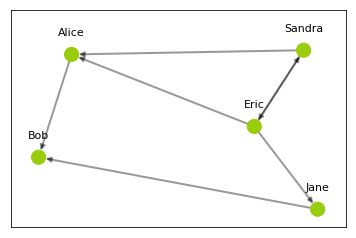

In [8]:
positioning = plot_graph(graph)

Graph objects can me dumped to dictionaries following the JSON format (note how the attribute values are encoded).

In [9]:
graph.to_json()

{'edges': [{'from': 'Alice',
   'to': 'Bob',
   'attrs': {'type': {'type': 'FiniteSet', 'data': ['friend']},
    'since': {'type': 'FiniteSet', 'data': [2004]}}},
  {'from': 'Jane',
   'to': 'Bob',
   'attrs': {'type': {'type': 'FiniteSet', 'data': ['parent']},
    'since': {'type': 'FiniteSet', 'data': [1993]}}},
  {'from': 'Eric',
   'to': 'Jane',
   'attrs': {'type': {'type': 'FiniteSet', 'data': ['friend']},
    'since': {'type': 'FiniteSet', 'data': [1985]}}},
  {'from': 'Eric',
   'to': 'Alice',
   'attrs': {'type': {'type': 'FiniteSet', 'data': ['parent']},
    'since': {'type': 'FiniteSet', 'data': [1992]}}},
  {'from': 'Eric',
   'to': 'Sandra',
   'attrs': {'type': {'type': 'FiniteSet', 'data': ['spouse']},
    'since': {'type': 'FiniteSet', 'data': [1990]}}},
  {'from': 'Sandra',
   'to': 'Eric',
   'attrs': {'type': {'type': 'FiniteSet', 'data': ['spouse']},
    'since': {'type': 'FiniteSet', 'data': [1990]}}},
  {'from': 'Sandra',
   'to': 'Alice',
   'attrs': {'type': {'t

### 2. Finding graph patterns

In [10]:
# Initialize a pattern graph

pattern = NXGraph()
pattern.add_nodes_from(["x", "y", "z"])
pattern.add_edges_from([
    ("x", "y"),
    ("z", "y")
])

# Find matchings of the pattern in the graph
instances = graph.find_matching(pattern)
print(instances)

[{'x': 'Sandra', 'y': 'Alice', 'z': 'Eric'}, {'z': 'Sandra', 'y': 'Alice', 'x': 'Eric'}, {'x': 'Alice', 'y': 'Bob', 'z': 'Jane'}, {'z': 'Alice', 'y': 'Bob', 'x': 'Jane'}]


We can equip pattern nodes and edges with attributes, then ReGraph will look for all subgraphs matching to the structure of the pattern _and_ whose elements contain respective attributes.

In [11]:
pattern.add_edge_attrs("x", "y", {"type": "parent"})
pattern.add_edge_attrs("z", "y", {"type": "parent"})

instances = graph.find_matching(pattern)
print(instances)

[{'x': 'Sandra', 'y': 'Alice', 'z': 'Eric'}, {'z': 'Sandra', 'y': 'Alice', 'x': 'Eric'}]


We can plot matchings inside the graph using `plot_instance`.

Instances:
{'x': 'Sandra', 'y': 'Alice', 'z': 'Eric'}


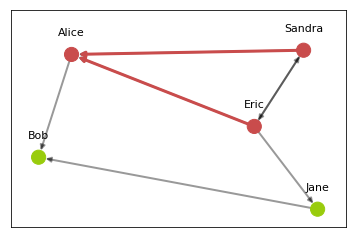

{'z': 'Sandra', 'y': 'Alice', 'x': 'Eric'}


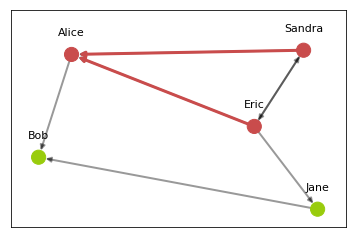

In [13]:
print("Instances:")
for instance in instances:
    print(instance)
    plot_instance(graph, pattern, instance, parent_pos=positioning) #filename=("instance_example_%d.png" % i))

### 3. Rewriting graph objects

ReGraph implements the rewriting technique called _Sesqui-pushout rewriting_ that allows to transform graphs by applying _rules_ through their instances (matchings). It allows to express the following graph transformations:

- node cloning,
- node/edge removal,
- node/edge attributes removal,
- node merging,
- node/edge addition,
- node/edge attribute addition.

A rewriting rule is a span $LHS \leftarrow P \rightarrow RHS$, where $LHS$ is a graph that represents a left-hand side of the rule -- a pattern that is going to be matched inside of the input graph, $P$ is a graph that represents the interfaces of the rule -- together with a homomorphism $LHS \leftarrow P$ it specifies nodes and edges that are going to be preserved in the course of application of the rule. $RHS$ and a homomorphism $P \rightarrow RHS$, on the other hand, specify nodes and edges that are going to be added. In addition, if two nodes $n^P_1, n^P_2$ of $P$ map to the same node $n^{LHS}$ in $LHS$, $n^{LHS}$ is going to be cloned during graph rewriting. Symmetrically, if two nodes of $n^P_1$ and $n^P_2$ in $P$ match to the same node $n^{RHS}$ in $RHS$, $n^P_1$ and $n^P_2$ are merged.


To rewrite the graph, we first create a rewriting rule (see `Tutorial_rules.ipynb` on more examples of rules and means for their creation provided by ReGraph). A data structure for rewriting rules is implemeted in the class `regraph.rules.Rule`. Here, we will use the created pattern to initialize a rule. ReGraph implements the util `plot_rule` ror rule visualization.

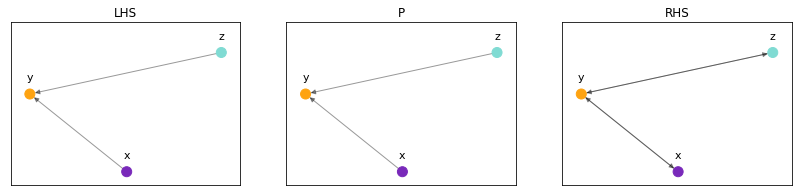

In [14]:
rule = Rule.from_transform(pattern)
rule.inject_add_edge("y", "x", {"type": "child_of"})
rule.inject_add_edge("y", "z", {"type": "child_of"})

plot_rule(rule)

Graph rewriting can be performed with the `rewrite` method of `NXGraph`. It takes as an input a rule and an instance of this rule. Rewriting is performed in-place, the provided graph object is modified and a dictionary corresponding to the $RHS$ matching in the rewritten graph ($RHS \rightarrowtail G'$) is returned.

In [15]:
# Back-up the graph
graph_backup = NXGraph.copy(graph)

# Rewrite using the first instances
rhs_graph = graph.rewrite(rule, instances[0])

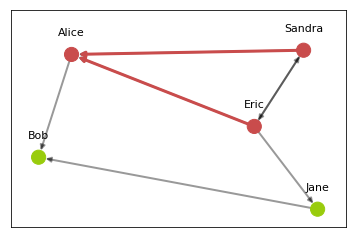

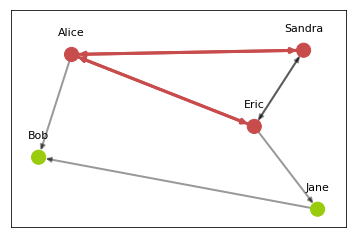

In [16]:
# Plot old instances in the backed-up graph
plot_instance(graph_backup, rule.lhs, instances[0], parent_pos=positioning)

# Plot RHS instance in the transformed graph
new_pos = plot_instance(graph, rule.rhs, rhs_graph, parent_pos=positioning)

Let us consider another example of a rewriting rule

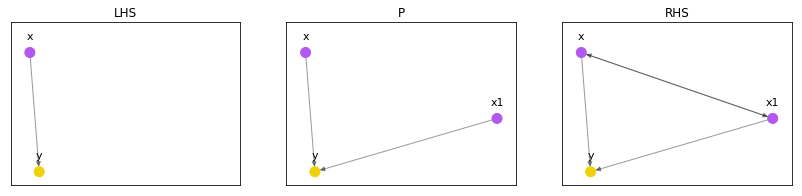

In [17]:
# Create a pattern
pattern = NXGraph()
pattern.add_nodes_from(["x", "y"])
pattern.add_edge("x", "y", {"type": "parent"})

# Initialize a rule that clones `x`, note that tha variable `rhs_clone_id`
# corresponds to the ID of the newly produced clone in the RHS of the rule
rule = Rule.from_transform(pattern)
_, rhs_clone_id = rule.inject_clone_node("x")
rule.inject_add_edge("x", rhs_clone_id, {"type": "spouse"})
rule.inject_add_edge(rhs_clone_id, "x", {"type": "spouse"})

plot_rule(rule)

In [18]:
# Find matching in the graph
instances = graph.find_matching(rule.lhs)
print(instances)

[{'x': 'Sandra', 'y': 'Alice'}, {'x': 'Eric', 'y': 'Alice'}, {'x': 'Jane', 'y': 'Bob'}]


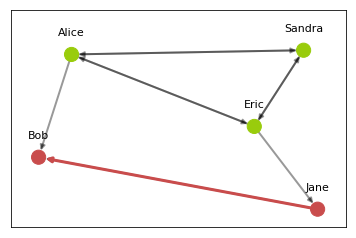

In [20]:
# Let us fix an instace
instance = {'x': 'Jane', 'y': 'Bob'}

new_pos = plot_instance(graph, rule.lhs, instance, parent_pos=new_pos)

In [21]:
rhs_graph = graph.rewrite(rule, instance)

/home/eugenia/anaconda3/envs/kami/lib/python3.7/site-packages/matplotlib-3.0.3-py3.7-linux-x86_64.egg/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


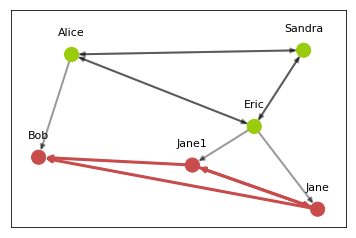

In [23]:
new_pos = plot_instance(graph, rule.rhs, rhs_graph, parent_pos=new_pos)